In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#----------Importing the Dataset-----------#

dataset = pd.read_csv('K:/Datasets/Multivariant_Linear_Regression/archive/50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
#----------Finding length(no. of rows) of dataset-----------#

len(dataset)

50

In [5]:
#----------Finding shape(no. of rows and columns) of dataset-----------#

dataset.shape

(50, 5)

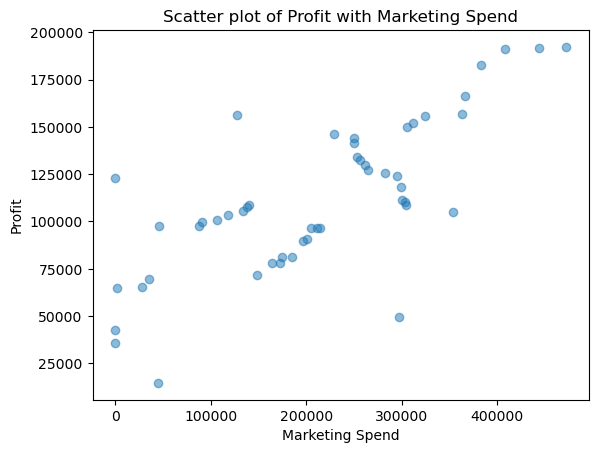

In [6]:
#----------Plotting----------#

plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

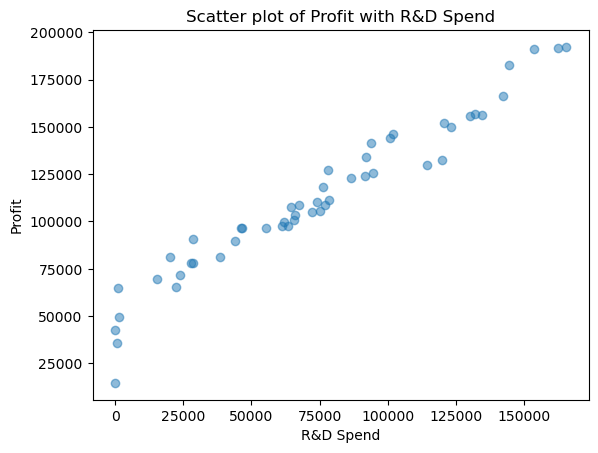

In [7]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

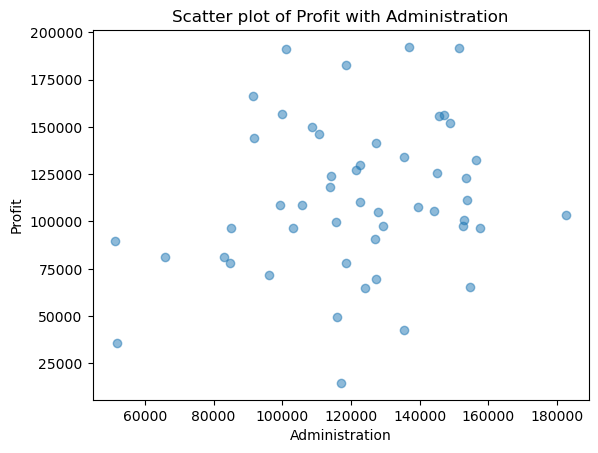

In [8]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

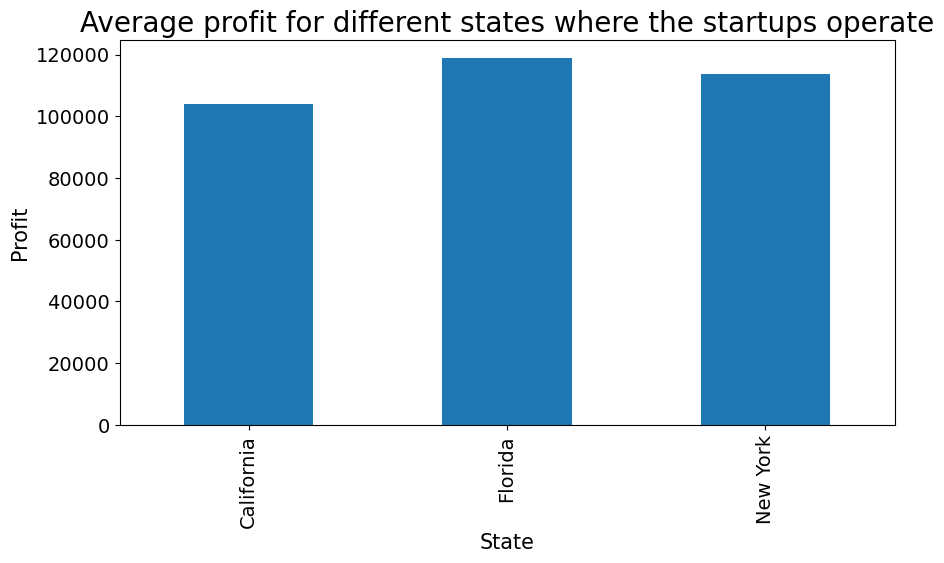

In [9]:
#----------Create the figure object----------#

ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10, 5), fontsize = 14)

#----------Set the Title----------#

ax.set_title('Average profit for different states where the startups operate', fontsize = 20)

#----------Set x and y axis labels----------#

ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
#----------Create dummy variables for the categorical variable state----------#

dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

#----------Now we will drop the original column state from dataframe----------#

dataset.drop(columns=['State'], axis=1, inplace=True)

In [12]:
dataset

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1
5,131876.90,99814.71,362861.36,156991.12,1,0,0
6,134615.46,147198.87,127716.82,156122.51,0,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0,1
8,120542.52,148718.95,311613.29,152211.77,1,0,0
9,123334.88,108679.17,304981.62,149759.96,0,1,0


In [13]:
#----------Declaring Dependent Variable----------#

dependent_variable = 'Profit'

dependent_variable

'Profit'

In [14]:
#----------Create a list of independent variables----------#

independent_variables = dataset.columns.tolist()

In [15]:
independent_variables.remove(dependent_variable)

In [16]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [17]:
#----------Create the data of Independent variables----------#

X = dataset[independent_variables].values

#----------Create the data of dependent variables----------#

y = dataset[dependent_variable].values

In [18]:
#----------Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
#----------Transforming Data----------#

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[0:10]

array([[0.60884455, 0.30836422, 0.52936195, 0.        , 1.        ,
        0.        ],
       [0.57246821, 0.71401273, 0.59894835, 1.        , 0.        ,
        0.        ],
       [0.47408436, 0.78021012, 0.63532724, 1.        , 0.        ,
        0.        ],
       [1.        , 0.65174393, 1.        , 1.        , 0.        ,
        0.        ],
       [0.09377566, 0.57930693, 0.07531871, 1.        , 0.        ,
        0.        ],
       [0.47180821, 0.53527036, 0.56031151, 0.        , 1.        ,
        0.        ],
       [0.37493063, 0.48992809, 0.19316302, 0.        , 0.        ,
        1.        ],
       [0.23319442, 0.24130912, 0.3709309 , 0.        , 1.        ,
        0.        ],
       [0.46116861, 0.47642362, 0.63305328, 0.        , 1.        ,
        0.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 1.        ,
        0.        ]])

In [21]:
#----------Fitting Multiple Linear Regression to the Training Set----------#


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
#----------Predicting the test set results----------#

y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([128512., 165888., 175104.,  92160., 172544., 114176., 115200.,
       110080.,  71168.,  74752.])

In [24]:
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))

In [25]:
RMSE

6632.935158448329

In [26]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

5563.899999999999

In [27]:
MSE = mean_squared_error(y_test, y_pred)
MSE

43995828.81617997

In [28]:
R_sq = r2_score(y_test, y_pred)
R_sq

0.9659407169445089

# CONCEPT OF GRADIENT DESCENT

Gradient Descent algorithm:

repeat until convergence 
{ 
   θ_j = θ_j - α (d×J(θ_0, θ_1) / d×θ_j)
   (for j = 1 and j = 0)
} 





Linear Regression Model:

h_θ (X) = θ_0 + θ_1 × X

J(θ_0, θ_1) = 1/2m × ( Σ from i to m (h_θ(X^i) - y^i)^2 )